## Dataset Description

<b>Data Set Information:</b>

Car Evaluation dataset evaluates cars according to the following concepts
<ul>
<li><b>buying</b> - buying price
<li><b>maint</b> - price of the maintenance
<li><b>COMFORT</b> - comfort
<li><b>doors</b> - number of doors
<li><b>persons</b> - capacity in terms of persons to carry
<li><b>lug_boot</b> - the size of luggage boot
<li><b>safety</b> - estimated safety of the car
</ul>


<b>Car Acceptance(Output Class):</b>
unacc, acc, good, vgood 

from the given data you need to buid machine learnig model for Car Acceptance 

In [29]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [62]:
#Import Dataset - set2_data.csv 
df=pd.read_csv('set2_data.csv')
df

,buying,maint,doors,persons,lug_boot,safety,car_acceptability
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,NaN,vhigh,2,2,med,low,unacc
4,vhigh,NaN,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [6]:
# Print top 5 and random 5 values - 2 Marks
import pandas as pd
import seaborn as sns

df = pd.read_csv("set2_data.csv")


print("Top 5 rows:")
print(df.head())

print("\nRandom 5 rows:")
print(df.sample(5, random_state=1))


Top 5 rows:
  buying  maint doors persons lug_boot safety car_acceptability
0  vhigh  vhigh     2       2    small    low             unacc
1  vhigh  vhigh     2       2    small    med             unacc
2  vhigh  vhigh     2       2    small   high             unacc
3    NaN  vhigh     2       2      med    low             unacc
4  vhigh    NaN     2       2      med    med             unacc

Random 5 rows:
     buying maint  doors persons lug_boot safety car_acceptability
1233    med   low      3    more    small    low             unacc
592    high  high      3    more      big    med               acc
625    high  high  5more       2      med    med             unacc
1546    low   med      3       2      big    med             unacc
730    high   med  5more       2    small    med             unacc


In [7]:
df.tail(5)

,buying,maint,doors,persons,lug_boot,safety,car_acceptability
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good
1727,low,low,5more,more,big,high,vgood


In [8]:
#Print column names - 1 Marks
df.columns.tolist()

['buying',
 'maint',
 'doors',
 'persons',
 'lug_boot',
 'safety',
 'car_acceptability']

In [9]:
#Check the data type of each column - 1 Marks
df.dtypes

buying               object
maint                object
doors                object
persons              object
lug_boot             object
safety               object
car_acceptability    object
dtype: object

In [10]:
#Print number of rows and columns - 1 Mark
df.shape

(1728, 7)

In [11]:
#Print summary statistics of all variables - 1 Mark
print(df.describe(include='all'))


       buying maint doors persons lug_boot safety car_acceptability
count    1727  1726  1728    1727     1727   1727              1728
unique      4     4     4       3        3      3                 4
top      high  high     2       2      med    low             unacc
freq      432   432   432     576      576    576              1210


In [12]:
#Print the number of missing values in each column - 1 Marks
df.isnull().sum()

buying               1
maint                2
doors                0
persons              1
lug_boot             1
safety               1
car_acceptability    0
dtype: int64

In [13]:
#Impute missing values - Replace missing categorical values with mode and numerical values with mean of the column - 3 Marks
#Print the number of missing values in each column after imputation
# Impute missing values
for col in df.columns:
    if df[col].dtype == 'object':  # Categorical column
        mode_val = df[col].mode()[0]
        df[col].fillna(mode_val, inplace=True)
        
    else:  # Numerical column
        mean_val = df[col].mean()
        df[col].fillna(mean_val, inplace=True)

# Print number of missing values in each column after imputation
print(df.isnull().sum())


buying               0
maint                0
doors                0
persons              0
lug_boot             0
safety               0
car_acceptability    0
dtype: int64


In [14]:
#Print count of each class - 1 Marks
df.count()

buying               1728
maint                1728
doors                1728
persons              1728
lug_boot             1728
safety               1728
car_acceptability    1728
dtype: int64

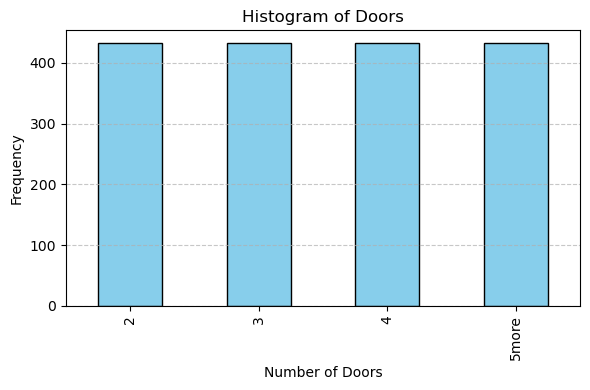

In [15]:
#Plot histogram of values doors column - 1 Marks 
import matplotlib.pyplot as plt

# Plot histogram of the 'doors' column
plt.figure(figsize=(6,4))
df['doors'].value_counts().sort_index().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Histogram of Doors')
plt.xlabel('Number of Doors')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()








#import matplotlib.pyplot as plt
#plt.hist(data=df,x='doors')
#plt.show()

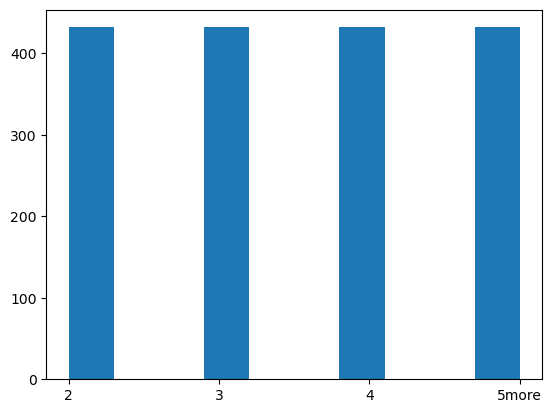

In [16]:

import matplotlib.pyplot as plt
plt.hist(data=df,x='doors')
plt.show()

In [17]:
# Plot bar of buying, maint, lug_boot, safety using 4X4 subplots - 3 Marks
#num_bins = 10


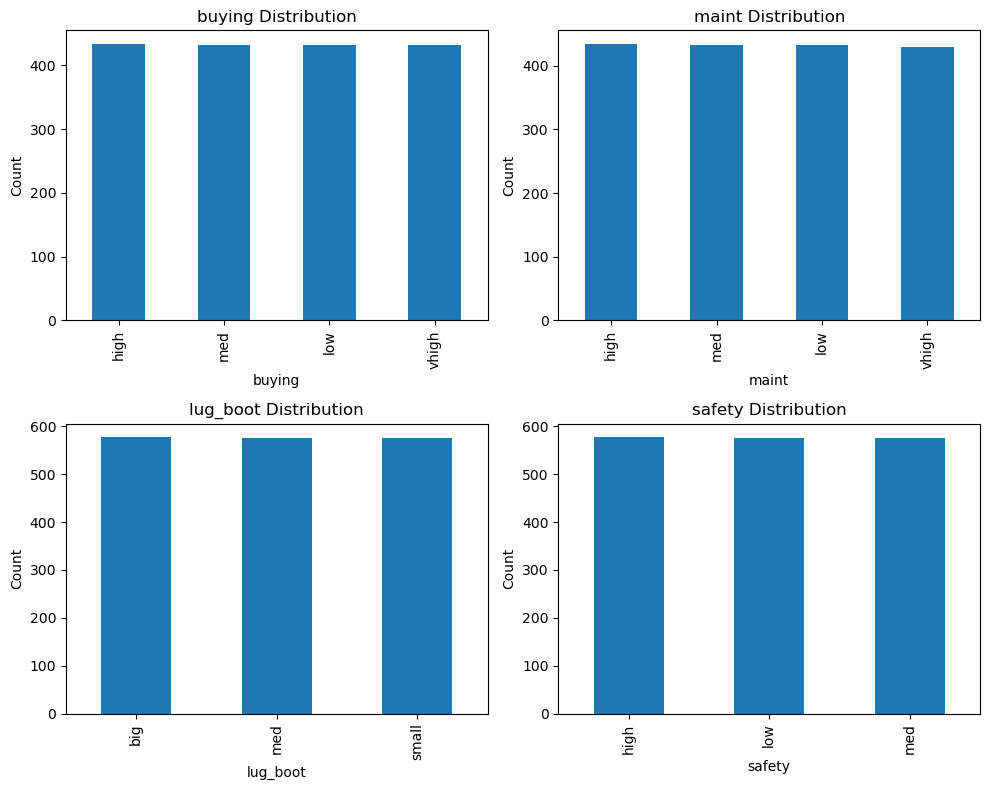

In [18]:
import matplotlib.pyplot as plt

cols = ['buying', 'maint', 'lug_boot', 'safety']
fig, axes = plt.subplots(2, 2, figsize=(10, 8))  # 2x2 layout is enough
axes = axes.flatten()

for i in range(4):
    df[cols[i]].value_counts().plot(kind='bar', ax=axes[i])
    axes[i].set_title(f'{cols[i]} Distribution')
    axes[i].set_xlabel(cols[i])
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()


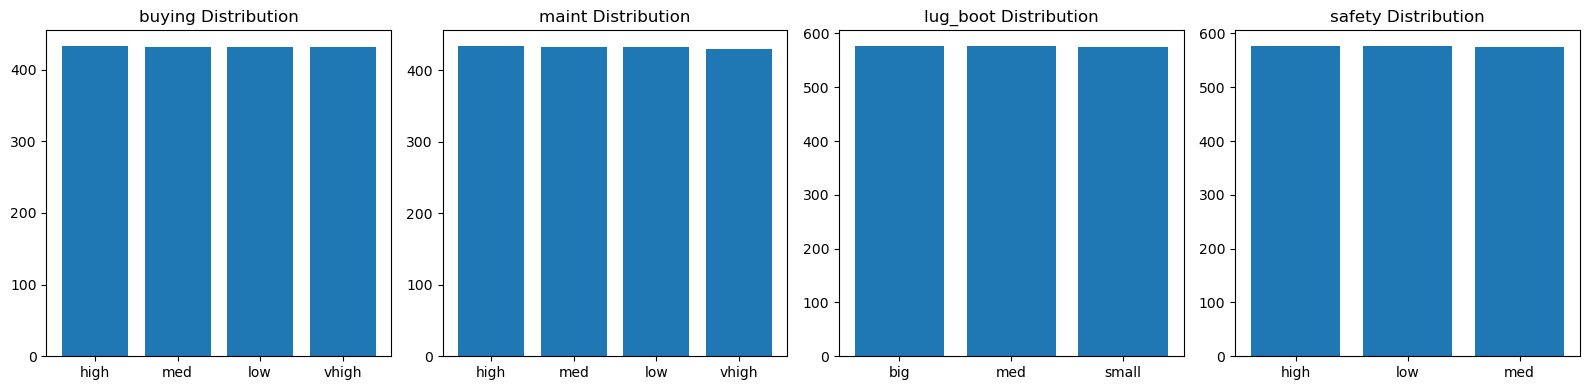

In [19]:
import matplotlib.pyplot as plt
cols = ['buying', 'maint', 'lug_boot', 'safety']
fig, axes = plt.subplots(1, 4, figsize=(16, 4))  # Changed from 4x4 to 1x4

for i, col in enumerate(cols):
    axes[i].bar(df[col].value_counts().index, df[col].value_counts().values)
    axes[i].set_title(f'{col} Distribution')

plt.tight_layout()
plt.show()



In [20]:
#Replace the value 5more and more with 5 in doors column - 1 Marks
# Replace '5more' and 'more' with '5' in the 'doors' column
df['doors'] = df['doors'].replace({'5more': '5', 'more': '5'})
df

,buying,maint,doors,persons,lug_boot,safety,car_acceptability
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,high,vhigh,2,2,med,low,unacc
4,vhigh,high,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5,more,med,med,good
1724,low,low,5,more,med,high,vgood
1725,low,low,5,more,big,low,unacc
1726,low,low,5,more,big,med,good


In [21]:
#Apply label encoder for categorical columns -  2 Marks
# Apply Label Encoding
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))

In [22]:
df.isnull().sum()

buying               0
maint                0
doors                0
persons              0
lug_boot             0
safety               0
car_acceptability    0
dtype: int64

In [23]:
df


,buying,maint,doors,persons,lug_boot,safety,car_acceptability
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,0,3,0,0,1,1,2
4,3,0,0,0,1,2,2
...,...,...,...,...,...,...,...
1723,1,1,3,2,1,2,1
1724,1,1,3,2,1,0,3
1725,1,1,3,2,0,1,2
1726,1,1,3,2,0,2,1


<Axes: title={'center': 'Car Acceptability Distribution'}, ylabel='count'>

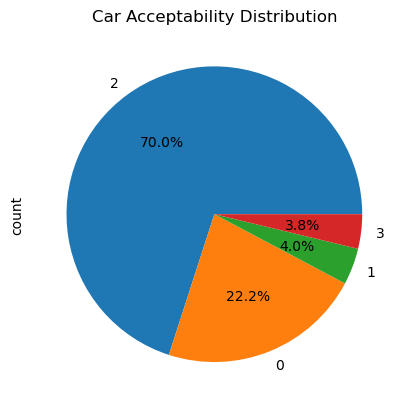

In [79]:
#Pie chart based on Car acceptability grouping - 1 Marks
df['car_acceptability'].value_counts().plot.pie(autopct='%1.1f%%', title='Car Acceptability Distribution')


In [80]:
#Prepare X - input matrix and y - label vector - 1 Mark
x=df.drop(columns=['car_acceptability'])
y=df['car_acceptability']
print(x)
print(y)


      buying  maint  doors  persons  lug_boot  safety
0          3      3      0        0         2       1
1          3      3      0        0         2       2
2          3      3      0        0         2       0
3          0      3      0        0         1       1
4          3      0      0        0         1       2
...      ...    ...    ...      ...       ...     ...
1723       1      1      3        2         1       2
1724       1      1      3        2         1       0
1725       1      1      3        2         0       1
1726       1      1      3        2         0       2
1727       1      1      3        2         0       0

[1728 rows x 6 columns]
0       2
1       2
2       2
3       2
4       2
       ..
1723    1
1724    3
1725    2
1726    1
1727    3
Name: car_acceptability, Length: 1728, dtype: int64


In [81]:
# Split the data into train and test set  - use test size = 30% and random state = 4 : - 2 Marks
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=4)



In [2]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical features
le = LabelEncoder()
for col in x_train.columns:
    x_train[col] = le.fit_transform(x_train[col])
    x_test[col] = le.transform(x_test[col])  # Use the same encoder for test data


NameError: name 'x_train' is not defined

In [3]:
# Importing decision tree classifier from sklearn library and fit the classifier on training data - 3 Marks
#Use proper values for the depth and criterion parameters
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(criterion='entropy', max_depth=5) # you can adjust depth as needed
clf.fit(x_train, y_train)


NameError: name 'x_train' is not defined

In [ ]:
y_pred = clf.predict(x_test)
y_pred

In [4]:
#Make predictions on test data - 1 Marks
# Training a model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
model = LinearRegression()
model.fit(x_train, y_train)

# Making predictions on test data
y_pred = model.predict(x_test)

# Optional: Evaluate model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error on Test Data:", mse)

# To view predictions
print("Predictions on Test Data:\n", y_pred)

NameError: name 'x_train' is not defined

In [5]:
#check the evaluation metrics of the model - Confusion Matrix, Accuracy, Precision, Recall, F1 score - 3 Marks

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
x=df.drop(columns=['car_acceptability'], axis=1)
y=df['car_acceptability']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state=4)


NameError: name 'df' is not defined

In [86]:
from sklearn.linear_model import LogisticRegression
le=LogisticRegression()


In [87]:
model=le.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2,
       2, 2, 2, 3, 0, 0, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 3, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2,
       2, 2, 2, 0, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 2, 2, 2, 3, 2, 2, 2, 2, 2,

In [88]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)



Confusion Matrix:
 [[ 15   0  91  11]
 [  2   0  15   0]
 [ 19   0 348   1]
 [  5   0   6   6]]


In [89]:
# Accuracy
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)



Accuracy: 0.7109826589595376


In [90]:
# Precision
prec = precision_score(y_test, y_pred, average='micro')
print("Precision:", prec)



Precision: 0.7109826589595376


In [91]:
rec = recall_score(y_test, y_pred, average='micro')
print("Recall:", rec)

# F1 Score
f1 = f1_score(y_test, y_pred, average='micro')
print("F1 Score:", f1)

Recall: 0.7109826589595376
F1 Score: 0.7109826589595376


In [92]:
#Draw the decision tree - 1 marks
from sklearn.tree import DecisionTreeClassifier,plot_tree
f=DecisionTreeClassifier()
f.fit(x_train,y_train)


DecisionTreeClassifier()

IndexError: list index out of range

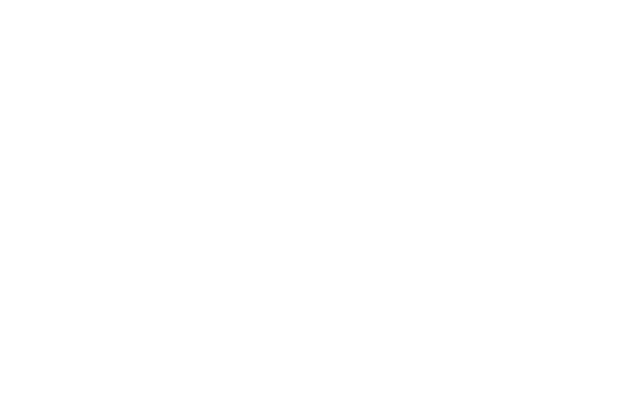

In [104]:
feature_names = ['buying', 'maint', 'lug_boot', 'safety']  # Replace with actual feature names

plt.figure(figsize=(8, 5))
plot_tree(clf, feature_names=feature_names, class_names=["0", "1"], filled=True)
plt.show()

print(x_train.shape)  # This should match the number of features in clf


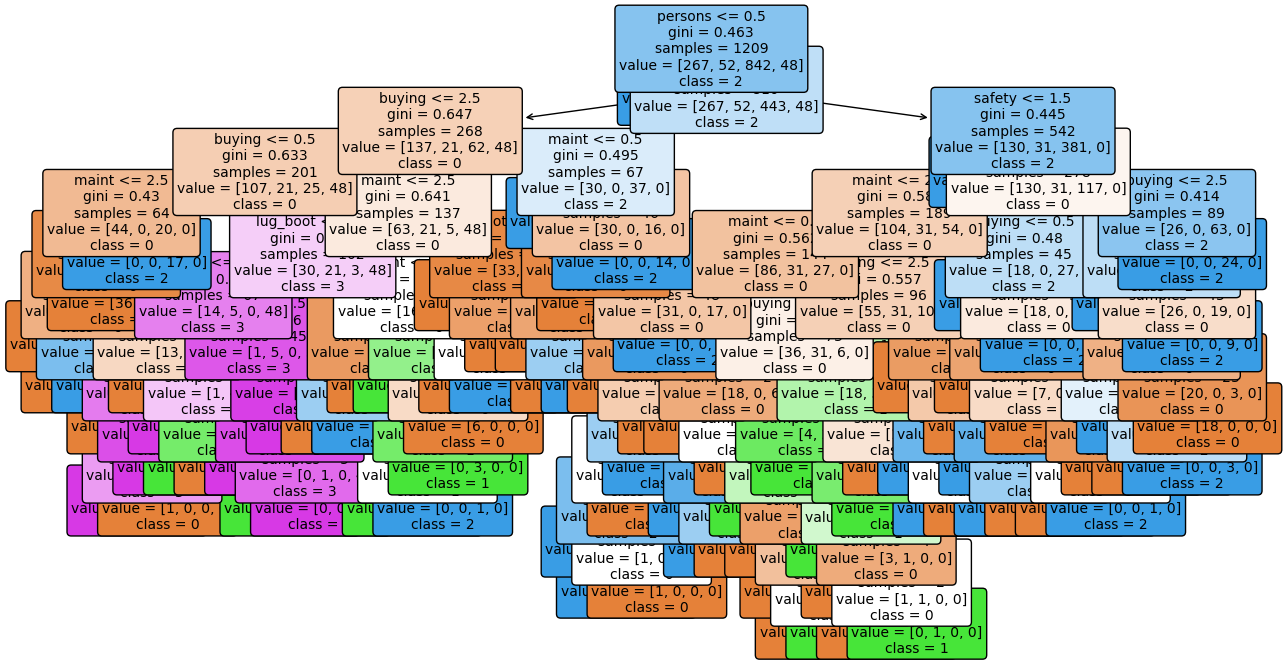

In [86]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))
plot_tree(
    f,
    feature_names=X.columns,
    class_names=[str(cls) for cls in f.classes_],  # SAFE: matches model classes
    filled=True,
    rounded=True,
    fontsize=10
)
plt.show()
